# MNIST Digit Recognition Project:

### a) Fetching Data


In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)


### b) Split data (60k train, 10k test)

In [2]:
X, y = mnist["data"], mnist["target"].astype(int)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

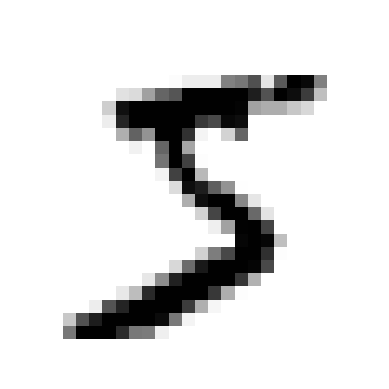

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X.iloc[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

### c) Train classifiers:

#### SGD Classifier (with hinge loss)

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)
y_pred_sgd = sgd_clf.predict(X_test)

#### Random Forest Classifier

In [5]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

### d) Evaluate using confusion matrix & classification report

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
# Evaluation: SGD
print("SGD Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sgd))
print("SGD Classification Report:\n", classification_report(y_test, y_pred_sgd))

# Evaluation: Random Forest
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

SGD Confusion Matrix:
 [[ 902    0    8   11    1   13    2    4   39    0]
 [   0 1095    2    3    0    2    4    1   28    0]
 [   1   10  803   69    6    4    4   10  122    3]
 [   0    1    6  931    1   21    3    7   35    5]
 [   2    2    9   15  778    4    2    9   62   99]
 [   6    2    1   71    3  709   12   12   67    9]
 [   5    3   12   13    5   21  854    0   45    0]
 [   0    3   18   20    3    4    1  919   18   42]
 [   3    5    2   30    4   43    5    5  872    5]
 [   3    5    2   33    7    5    0   20   57  877]]
SGD Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       980
           1       0.97      0.96      0.97      1135
           2       0.93      0.78      0.85      1032
           3       0.78      0.92      0.84      1010
           4       0.96      0.79      0.87       982
           5       0.86      0.79      0.83       892
           6       0.96      0.89      

### e) Visualize errors (plot worst misclassifications)

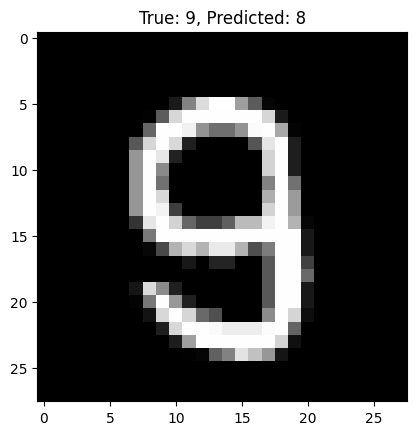

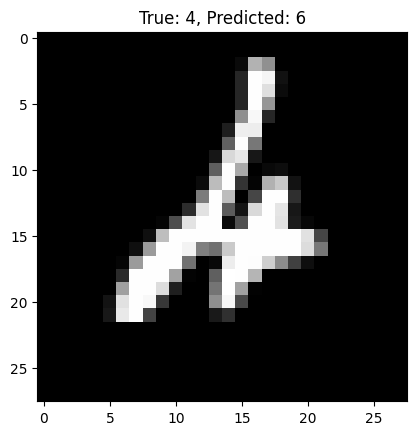

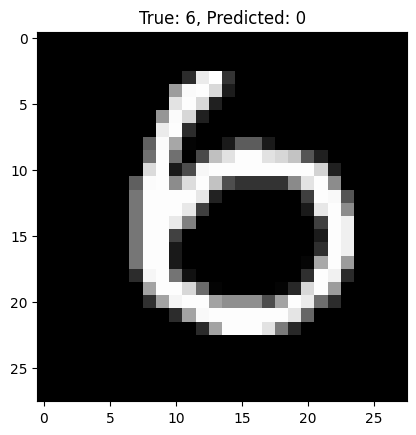

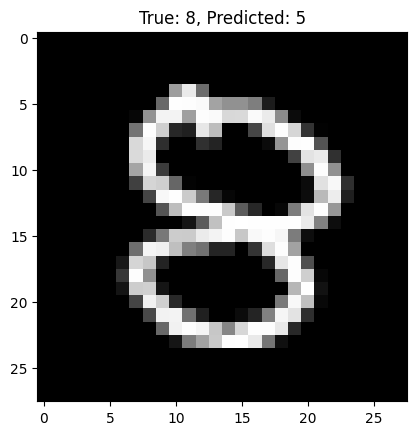

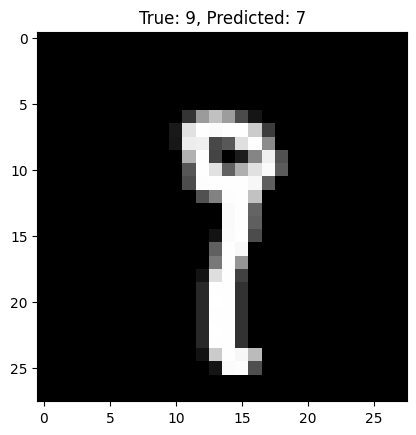

In [7]:
import matplotlib.pyplot as plt
errors = y_test != y_pred_rf
error_images = X_test[errors].to_numpy()
error_labels = y_test[errors].to_numpy()
error_preds = y_pred_rf[errors]
for i in range(5):  # Plot 5 errors
    plt.imshow(error_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {error_labels[i]}, Predicted: {error_preds[i]}")
    plt.show()

### f) Save trained models

In [9]:
# Step 7: Save trained models
import joblib
import os

os.makedirs("../models", exist_ok=True)
joblib.dump(sgd_clf, "../models/sgd_model.pkl")
joblib.dump(rf_clf, "../models/rf_model.pkl")


['../models/rf_model.pkl']